In [93]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

In [3]:
df = pd.read_csv('data/data.csv', encoding='latin1')
abusive = pd.read_csv('data/abusive.csv', encoding='utf-8')
new_kamusalay = pd.read_csv('data/new_kamusalay.csv', encoding='latin1')

In [4]:
new_kamusalay = pd.read_csv('data/new_kamusalay.csv', encoding='latin1', header=None)
new_kamusalay.columns = ['word','meaning']

In [101]:
df.duplicated().sum()

125

In [102]:
df = df.drop_duplicates()

In [103]:
df.duplicated().sum()

0

In [108]:
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,lenght_of_Characters_with_spaces,lenght_of_Words,user_mentioned,abusive_words_mentioned,alay_words_mentioned,alay_words_mentioned_grouped
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138,25,0,1,4,4
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120,21,2,1,3,3
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254,37,0,0,2,2
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75,14,2,1,3,3
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89,14,2,2,6,5


In [5]:
list_of_alay_words = new_kamusalay.word.values

In [7]:
new_kamusalay

,word,meaning
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
...,...,...
15162,mendikbud,menteri pendidikan dan kebudayaan
15163,mendag,menteri perdagangan
15164,menaker,menteri tenaga kerja
15165,memetwit,mentwit


In [8]:
df['Tweet'].apply(lambda x: len(x))

0        138
1        120
2        254
3         75
4         89
        ... 
13164     61
13165     28
13166     62
13167    135
13168     53
Name: Tweet, Length: 13169, dtype: int64

In [9]:
df['Tweet'].apply(lambda x: len(x.split()))

0        25
1        21
2        37
3        14
4        14
         ..
13164    10
13165     5
13166     9
13167    22
13168    10
Name: Tweet, Length: 13169, dtype: int64

In [10]:
df['lenght_of_Characters_with_spaces'] = df['Tweet'].apply(lambda x: len(x))

In [11]:
df['lenght_of_Words'] = df['Tweet'].apply(lambda x: len(x.split()))

In [12]:
df[['lenght_of_Words','lenght_of_Characters_with_spaces']].corr()

,lenght_of_Words,lenght_of_Characters_with_spaces
lenght_of_Words,1.000000,0.954934
lenght_of_Characters_with_spaces,0.954934,1.000000


<Axes: xlabel='lenght_of_Characters_with_spaces', ylabel='lenght_of_Words'>

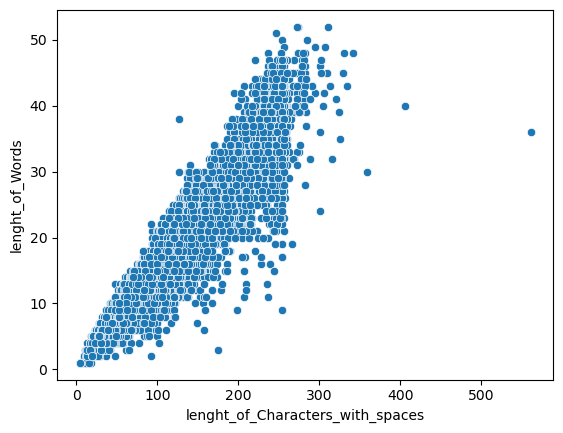

In [13]:
sns.scatterplot(x=df['lenght_of_Characters_with_spaces'], y=df['lenght_of_Words'])

In [14]:
df[['lenght_of_Words','lenght_of_Characters_with_spaces','HS']].corr()

,lenght_of_Words,lenght_of_Characters_with_spaces,HS
lenght_of_Words,1.000000,0.954934,-0.129296
lenght_of_Characters_with_spaces,0.954934,1.000000,-0.148950
HS,-0.129296,-0.148950,1.000000


In [15]:
df['user_mentioned'] = df['Tweet'].apply(lambda x: len(re.findall(r'USER',x)))

In [16]:
df[['lenght_of_Words','lenght_of_Characters_with_spaces','user_mentioned','HS']].corr()

,lenght_of_Words,lenght_of_Characters_with_spaces,user_mentioned,HS
lenght_of_Words,1.000000,0.954934,0.097918,-0.129296
lenght_of_Characters_with_spaces,0.954934,1.000000,0.037997,-0.148950
user_mentioned,0.097918,0.037997,1.000000,0.075015
HS,-0.129296,-0.148950,0.075015,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

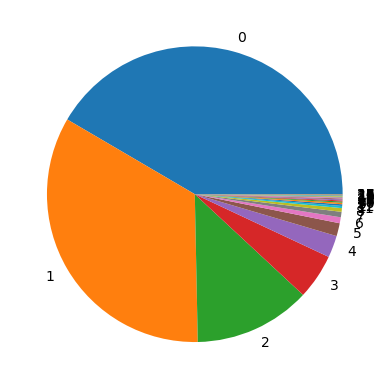

In [17]:
plt.pie(df['user_mentioned'].value_counts(),labels=df['user_mentioned'].value_counts().keys())
plt.show

In [18]:
list_of_abusive_words = abusive.ABUSIVE.values

In [19]:
df['abusive_words_mentioned'] = df['Tweet'].apply(lambda x: sum([1 if word.lower() in list_of_abusive_words else 0 for word in x.split(" ")]))

In [20]:
df['abusive_words_mentioned'].value_counts()

0     8222
1     4047
2      716
3      138
4       30
5        8
6        4
7        2
15       1
8        1
Name: abusive_words_mentioned, dtype: int64

In [21]:
df[['lenght_of_Words','lenght_of_Characters_with_spaces','user_mentioned','abusive_words_mentioned','Abusive','HS']].corr()

,lenght_of_Words,lenght_of_Characters_with_spaces,user_mentioned,abusive_words_mentioned,Abusive,HS
lenght_of_Words,1.000000,0.954934,0.097918,0.035649,-0.194017,-0.129296
lenght_of_Characters_with_spaces,0.954934,1.000000,0.037997,0.015954,-0.212749,-0.148950
user_mentioned,0.097918,0.037997,1.000000,0.047292,0.081804,0.075015
abusive_words_mentioned,0.035649,0.015954,0.047292,1.000000,0.362539,0.153796
Abusive,-0.194017,-0.212749,0.081804,0.362539,1.000000,0.368595
HS,-0.129296,-0.148950,0.075015,0.153796,0.368595,1.000000


In [22]:
df['alay_words_mentioned'] = df['Tweet'].apply(lambda x: sum([1 if word.lower() in list_of_alay_words else 0 for word in x.split(" ")]))

In [23]:
df['alay_words_mentioned'].value_counts()

2     2221
1     2071
3     1895
4     1484
0     1321
5     1033
6      802
7      554
8      428
9      288
10     241
11     170
12     150
13     114
14      85
15      78
16      44
18      36
17      31
19      28
21      25
20      23
22      21
23      17
25       3
24       2
27       1
29       1
33       1
31       1
Name: alay_words_mentioned, dtype: int64

In [24]:
df['abusive_words_mentioned']

0        1
1        1
2        0
3        1
4        2
        ..
13164    1
13165    0
13166    1
13167    0
13168    0
Name: abusive_words_mentioned, Length: 13169, dtype: int64

In [25]:
df['alay_words_mentioned']

0        4
1        3
2        2
3        3
4        6
        ..
13164    5
13165    1
13166    2
13167    4
13168    1
Name: alay_words_mentioned, Length: 13169, dtype: int64

In [26]:
df[['lenght_of_Words','lenght_of_Characters_with_spaces','user_mentioned','abusive_words_mentioned','alay_words_mentioned','Abusive','HS']].corr()

,lenght_of_Words,lenght_of_Characters_with_spaces,user_mentioned,abusive_words_mentioned,alay_words_mentioned,Abusive,HS
lenght_of_Words,1.000000,0.954934,0.097918,0.035649,0.516186,-0.194017,-0.129296
lenght_of_Characters_with_spaces,0.954934,1.000000,0.037997,0.015954,0.397778,-0.212749,-0.148950
user_mentioned,0.097918,0.037997,1.000000,0.047292,0.584776,0.081804,0.075015
abusive_words_mentioned,0.035649,0.015954,0.047292,1.000000,0.101635,0.362539,0.153796
alay_words_mentioned,0.516186,0.397778,0.584776,0.101635,1.000000,0.100555,0.084468
Abusive,-0.194017,-0.212749,0.081804,0.362539,0.100555,1.000000,0.368595
HS,-0.129296,-0.148950,0.075015,0.153796,0.084468,0.368595,1.000000


In [27]:
df.columns

Index(['Tweet', 'HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion',
       'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak',
       'HS_Moderate', 'HS_Strong', 'lenght_of_Characters_with_spaces',
       'lenght_of_Words', 'user_mentioned', 'abusive_words_mentioned',
       'alay_words_mentioned'],
      dtype='object')

In [28]:
HS_COLUMNS = [column_name for column_name in df.columns if 'HS' in column_name]

In [29]:
df[['abusive_words_mentioned']+HS_COLUMNS].corr()

,abusive_words_mentioned,HS,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
abusive_words_mentioned,1.000000,0.153796,0.086652,0.104587,0.059328,0.057031,0.096968,0.124543,0.066892,0.099097,0.134125,-0.066435
HS,0.153796,1.000000,0.713998,0.492912,0.296077,0.247873,0.185471,0.180405,0.736651,0.687713,0.451079,0.225765
HS_Individual,0.086652,0.713998,1.000000,-0.257246,0.035690,-0.000549,0.213400,0.182398,0.637545,0.963186,-0.235414,0.058354
HS_Group,0.104587,0.492912,-0.257246,1.000000,0.364294,0.342798,-0.009207,0.022328,0.224446,-0.247776,0.915132,0.239084
HS_Religion,0.059328,0.296077,0.035690,0.364294,1.000000,0.095878,-0.002993,0.024522,-0.159422,0.035277,0.343558,0.083226
HS_Race,0.057031,0.247873,-0.000549,0.342798,0.095878,1.000000,-0.028763,-0.020260,-0.133467,-0.007199,0.239469,0.242798
HS_Physical,0.096968,0.185471,0.213400,-0.009207,-0.002993,-0.028763,1.000000,0.053750,-0.099867,0.220254,0.000265,-0.025330
HS_Gender,0.124543,0.180405,0.182398,0.022328,0.024522,-0.020260,0.053750,1.000000,-0.097139,0.189647,0.029100,-0.018936
HS_Other,0.066892,0.736651,0.637545,0.224446,-0.159422,-0.133467,-0.099867,-0.097139,1.000000,0.606733,0.225106,0.124581
HS_Weak,0.099097,0.687713,0.963186,-0.247776,0.035277,-0.007199,0.220254,0.189647,0.606733,1.000000,-0.226747,-0.113487


<Axes: >

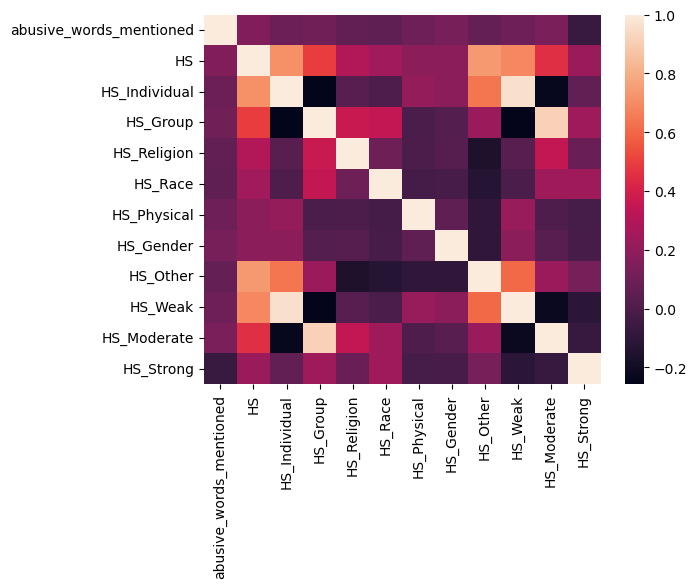

In [30]:
sns.heatmap(df[['abusive_words_mentioned']+HS_COLUMNS].corr())

<Axes: xlabel='HS_Weak', ylabel='HS_Individual'>

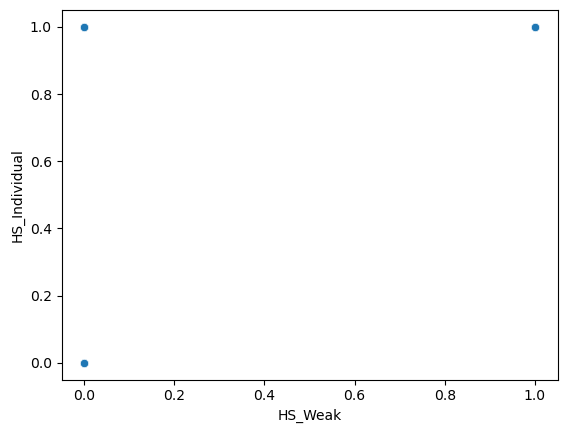

In [31]:
sns.scatterplot(x=df['HS_Weak'], y=df['HS_Individual'])

In [32]:
df[['lenght_of_Words','lenght_of_Characters_with_spaces','user_mentioned','abusive_words_mentioned','alay_words_mentioned']].describe()

,lenght_of_Words,lenght_of_Characters_with_spaces,user_mentioned,abusive_words_mentioned,alay_words_mentioned
count,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000
mean,17.282102,114.202749,1.243299,0.464272,3.980484
std,10.231973,69.075620,2.211488,0.703955,3.732330
min,1.000000,4.000000,0.000000,0.000000,0.000000
25%,9.000000,59.000000,0.000000,0.000000,1.000000
50%,15.000000,100.000000,1.000000,0.000000,3.000000
75%,23.000000,152.000000,1.000000,1.000000,5.000000
max,52.000000,561.000000,27.000000,15.000000,33.000000


<Axes: xlabel='lenght_of_Words', ylabel='Count'>

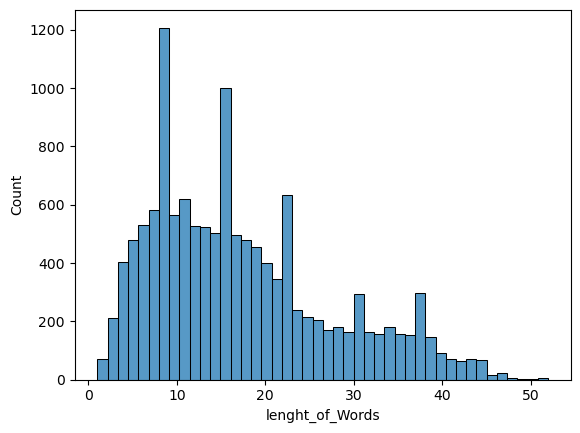

In [33]:
sns.histplot(df['lenght_of_Words'])

<Axes: xlabel='lenght_of_Characters_with_spaces', ylabel='Count'>

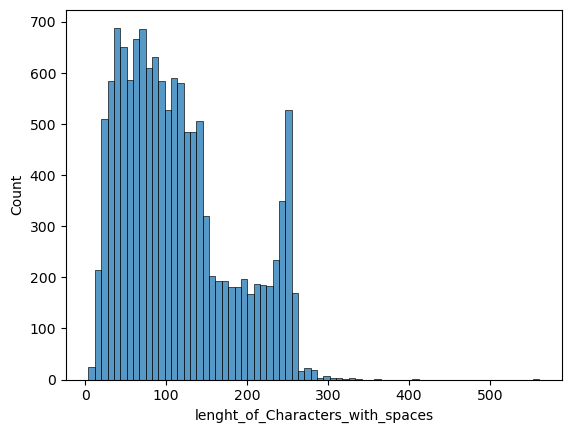

In [34]:
sns.histplot(df['lenght_of_Characters_with_spaces'])

<Axes: xlabel='alay_words_mentioned', ylabel='Count'>

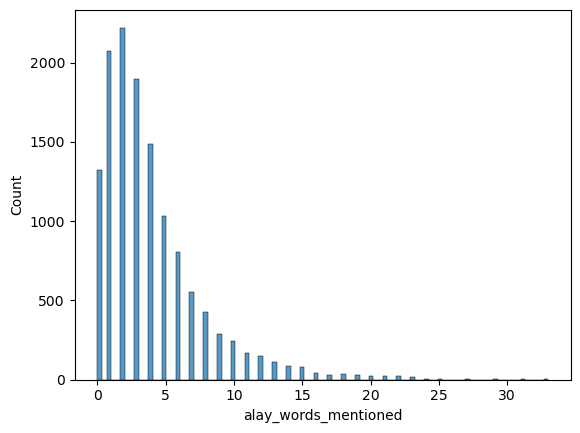

In [35]:
sns.histplot(df['alay_words_mentioned'])

<Axes: xlabel='user_mentioned', ylabel='Count'>

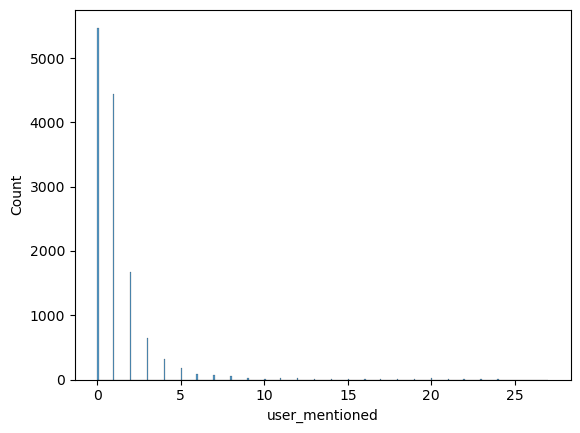

In [36]:
sns.histplot(df['user_mentioned'])

<Axes: xlabel='abusive_words_mentioned', ylabel='Count'>

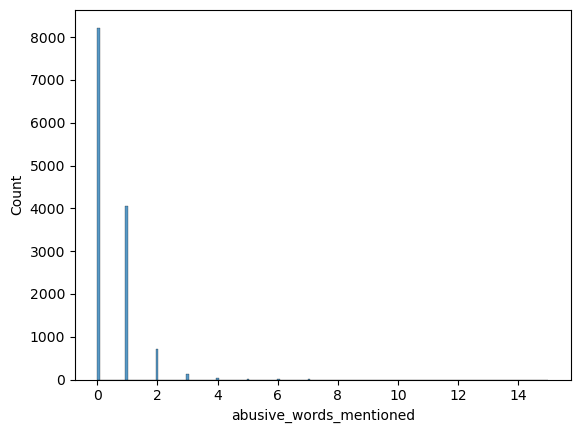

In [37]:
sns.histplot(df['abusive_words_mentioned'])

In [38]:
df.describe()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,lenght_of_Characters_with_spaces,lenght_of_Words,user_mentioned,abusive_words_mentioned,alay_words_mentioned
count,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000
mean,0.422280,0.382945,0.271471,0.150809,0.060217,0.042980,0.024527,0.023236,0.284000,0.256891,0.129471,0.035918,114.202749,17.282102,1.243299,0.464272,3.980484
std,0.493941,0.486123,0.444735,0.357876,0.237898,0.202819,0.154685,0.150659,0.450954,0.436935,0.335733,0.186092,69.075620,10.231973,2.211488,0.703955,3.732330
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.000000,9.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,15.000000,1.000000,0.000000,3.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,152.000000,23.000000,1.000000,1.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,561.000000,52.000000,27.000000,15.000000,33.000000


In [39]:
df[df.columns[1:]].corr()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,lenght_of_Characters_with_spaces,lenght_of_Words,user_mentioned,abusive_words_mentioned,alay_words_mentioned
HS,1.000000,0.368595,0.713998,0.492912,0.296077,0.247873,0.185471,0.180405,0.736651,0.687713,0.451079,0.225765,-0.148950,-0.129296,0.075015,0.153796,0.084468
Abusive,0.368595,1.000000,0.289782,0.148622,0.070476,-0.028304,0.196235,0.187492,0.264936,0.313377,0.188486,-0.097490,-0.212749,-0.194017,0.081804,0.362539,0.100555
HS_Individual,0.713998,0.289782,1.000000,-0.257246,0.035690,-0.000549,0.213400,0.182398,0.637545,0.963186,-0.235414,0.058354,-0.140994,-0.119682,0.065648,0.086652,0.075249
HS_Group,0.492912,0.148622,-0.257246,1.000000,0.364294,0.342798,-0.009207,0.022328,0.224446,-0.247776,0.915132,0.239084,-0.030366,-0.029724,0.021955,0.104587,0.023069
HS_Religion,0.296077,0.070476,0.035690,0.364294,1.000000,0.095878,-0.002993,0.024522,-0.159422,0.035277,0.343558,0.083226,-0.005674,0.003535,-0.020199,0.059328,-0.010650
HS_Race,0.247873,-0.028304,-0.000549,0.342798,0.095878,1.000000,-0.028763,-0.020260,-0.133467,-0.007199,0.239469,0.242798,-0.057099,-0.048548,-0.021114,0.057031,-0.015244
HS_Physical,0.185471,0.196235,0.213400,-0.009207,-0.002993,-0.028763,1.000000,0.053750,-0.099867,0.220254,0.000265,-0.025330,-0.043721,-0.035512,0.032948,0.096968,0.043053
HS_Gender,0.180405,0.187492,0.182398,0.022328,0.024522,-0.020260,0.053750,1.000000,-0.097139,0.189647,0.029100,-0.018936,-0.024621,-0.017160,0.028845,0.124543,0.047130
HS_Other,0.736651,0.264936,0.637545,0.224446,-0.159422,-0.133467,-0.099867,-0.097139,1.000000,0.606733,0.225106,0.124581,-0.110261,-0.102027,0.077600,0.066892,0.078869
HS_Weak,0.687713,0.313377,0.963186,-0.247776,0.035277,-0.007199,0.220254,0.189647,0.606733,1.000000,-0.226747,-0.113487,-0.131945,-0.108991,0.077171,0.099097,0.090482


<Axes: >

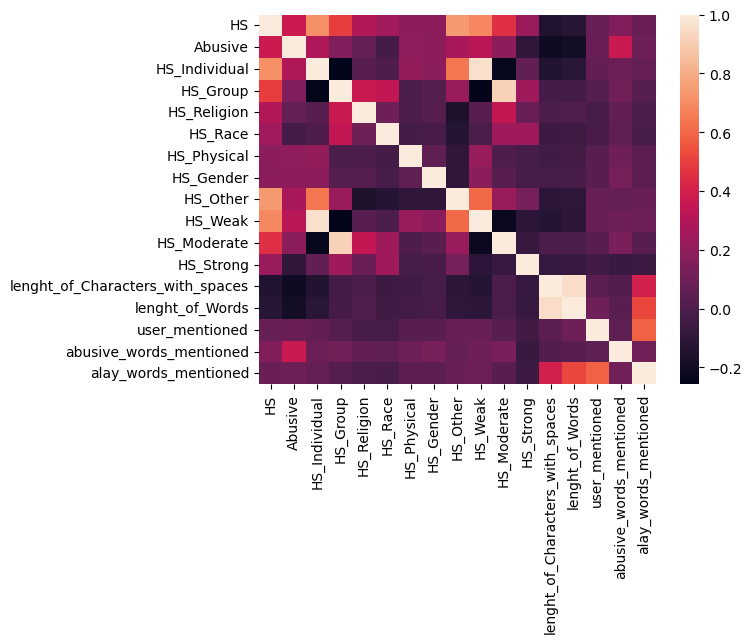

In [40]:
sns.heatmap(df[df.columns[1:]].corr())

<Axes: xlabel='lenght_of_Characters_with_spaces', ylabel='alay_words_mentioned'>

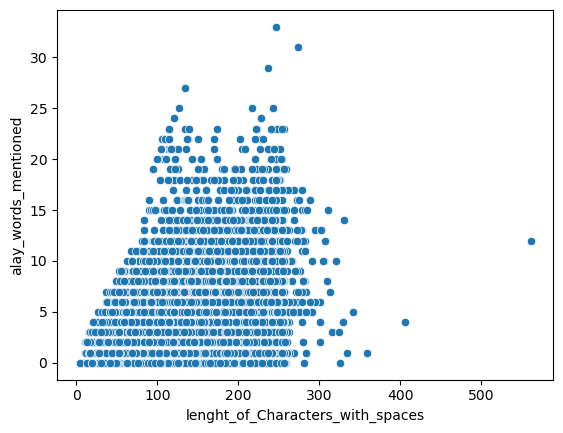

In [41]:
sns.scatterplot(x=df['lenght_of_Characters_with_spaces'], y=df['alay_words_mentioned'])

<Axes: xlabel='user_mentioned', ylabel='alay_words_mentioned'>

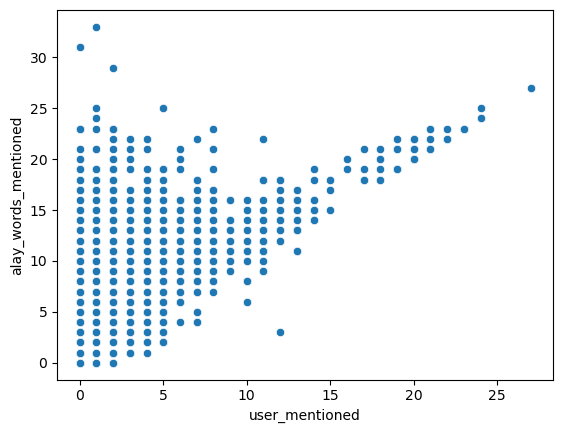

In [42]:
sns.scatterplot(x=df['user_mentioned'], y=df['alay_words_mentioned'])

In [43]:
df[['user_mentioned','alay_words_mentioned']].corr()

,user_mentioned,alay_words_mentioned
user_mentioned,1.000000,0.584776
alay_words_mentioned,0.584776,1.000000


In [44]:
def grouping_alay_words_mentioned(sum_alay_words):
    if sum_alay_words >= 10:
        return 10
    elif sum_alay_words in [5,6,7,8,9]:
        return 5
    else:
        return sum_alay_words

In [45]:
df['alay_words_mentioned_grouped'] = df['alay_words_mentioned'].apply(lambda x: grouping_alay_words_mentioned(x))

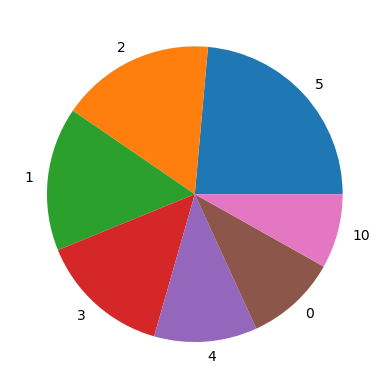

In [46]:
plt.pie(df['alay_words_mentioned_grouped'].value_counts(),labels=df['alay_words_mentioned_grouped'].value_counts().keys())
plt.show()

In [47]:
df[['alay_words_mentioned','alay_words_mentioned_grouped','HS']].corr()

,alay_words_mentioned,alay_words_mentioned_grouped,HS
alay_words_mentioned,1.000000,0.938692,0.084468
alay_words_mentioned_grouped,0.938692,1.000000,0.109066
HS,0.084468,0.109066,1.000000


In [48]:
df.loc[df['HS'] == 1].iloc[0:10].values

array([["- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !'",
        1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 138, 25, 0, 1, 4, 4],
       ["USER USER Kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah'",
        1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 89, 14, 2, 2, 6, 5],
       ["USER Ya bani taplak dkk \\xf0\\x9f\\x98\\x84\\xf0\\x9f\\x98\\x84\\xf0\\x9f\\x98\\x84'",
        1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 73, 6, 1, 2, 2, 2],
       ["Setidaknya gw punya jari tengah buat lu, sebelom gw ukur nyali sama bacot lu \\xf0\\x9f\\x98\\x8f'",
        1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 94, 15, 0, 1, 4, 4],
       ['USER USER USER USER BANCI KALENG MALU GA BISA JAWAB PERTANYAAN KAMI DARI 2 HARI LALU.... NYUNGSEP KOE USER URL',
        1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 110, 20, 5, 1, 7, 5],
       ['Aktor huruhara 98 Prabowo S ingin lengserkan pemerintahan Jokowi.... Nyata',
        

In [49]:
df.loc[df['HS'] == 1].loc[df['user_mentioned'] > 20].Tweet.values

array(['USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER',
       'USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER',
       'USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER',
       'USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER',
       'USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER Sarap nih pendukung Prabowo.',
       'USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER',
       'USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER',
       'USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USE

In [50]:
df.loc[df['Tweet'].duplicated()].values

array([['#GubernurZamanNow #GusIpulPuti2 #GanjarYasin1 #DjarotSihar2 #HasanAnton2 #KosterAce1 #NurdinSudirman3 #KarolinGidot2 RT USER: "Keanekaragaman budaya, suku, agama, itulah sesungguhnya kekayaan kita,â?? tutur Djarot di hadapan peserta Rakercabsuâ?¦',
        0, 0, ..., 0, 0, 0],
       ['#GubernurZamanNow #GusIpulPuti2 #GanjarYasin1 #DjarotSihar2 #HasanAnton2 #KosterAce1 #NurdinSudirman3 #KarolinGidot2 RT USER: "Keanekaragaman budaya, suku, agama, itulah sesungguhnya kekayaan kita,â?? tutur Djarot di hadapan peserta Rakercabsuâ?¦',
        0, 0, ..., 0, 0, 0],
       ['perempuan kaya lo mending mati aja deh, jelek aja, gausa sok jadi make up artist!',
        1, 1, ..., 0, 4, 4],
       ...,
       ['SETUJU SAYA,KLAU AHOK DAPAT GELAR SANTRI KEHORMATAN.... TAPI SANTRI KEHORMATAN BABI.... URL',
        1, 1, ..., 0, 1, 1],
       ['USER ahmad dhani yang terhormat paling babi paling anjing aing kontol paling lonte tungu saat nya karier mu akan habis!!!!',
        1, 1, ..., 4, 3, 3

In [51]:
df['Tweet'].values[0:10]

array(["- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !'",
       "RT USER: USER siapa yang telat ngasih tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga'",
       '41. Kadang aku berfikir, kenapa aku tetap percaya pada Tuhan padahal aku selalu jatuh berkali-kali. Kadang aku merasa Tuhan itu ninggalkan aku sendirian. Ketika orangtuaku berencana berpisah, ketika kakakku lebih memilih jadi Kristen. Ketika aku anak ter',
       "USER USER AKU ITU AKU\\n\\nKU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU'",
       "USER USER Kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah'",
       "USER Ya bani taplak dkk \\xf0\\x9f\\x98\\x84\\xf0\\x9f\\x98\\x84\\xf0\\x9f\\x98\\x84'",
       'deklarasi pilkada 2018 aman dan anti hoax warga dukuh sari jabon',
       'Gue baru aja kelar re-watch Aldnoah Zero!!! paling kampret emang endingnya! 2 karakter u

In [52]:
df['user_mentioned'].value_counts()

0     5474
1     4445
2     1680
3      652
4      316
5      187
6       86
7       78
8       53
11      31
12      24
9       22
20      17
13      15
10      15
22      13
21      12
14      12
19       9
23       7
18       6
17       6
15       4
16       2
24       2
27       1
Name: user_mentioned, dtype: int64

In [53]:
df.duplicated().sum()

125

In [54]:
df.duplicated().iloc[0]

False

In [55]:
df['Tweet'].duplicated().values

array([False, False, False, ..., False, False, False])

In [56]:
df[df.columns[1:]].mean()

HS                                    0.422280
Abusive                               0.382945
HS_Individual                         0.271471
HS_Group                              0.150809
HS_Religion                           0.060217
HS_Race                               0.042980
HS_Physical                           0.024527
HS_Gender                             0.023236
HS_Other                              0.284000
HS_Weak                               0.256891
HS_Moderate                           0.129471
HS_Strong                             0.035918
lenght_of_Characters_with_spaces    114.202749
lenght_of_Words                      17.282102
user_mentioned                        1.243299
abusive_words_mentioned               0.464272
alay_words_mentioned                  3.980484
alay_words_mentioned_grouped          3.369960
dtype: float64

In [57]:
df[df.columns[1:]].median()

HS                                    0.0
Abusive                               0.0
HS_Individual                         0.0
HS_Group                              0.0
HS_Religion                           0.0
HS_Race                               0.0
HS_Physical                           0.0
HS_Gender                             0.0
HS_Other                              0.0
HS_Weak                               0.0
HS_Moderate                           0.0
HS_Strong                             0.0
lenght_of_Characters_with_spaces    100.0
lenght_of_Words                      15.0
user_mentioned                        1.0
abusive_words_mentioned               0.0
alay_words_mentioned                  3.0
alay_words_mentioned_grouped          3.0
dtype: float64

In [58]:
df[df.columns[1:]].mode()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,lenght_of_Characters_with_spaces,lenght_of_Words,user_mentioned,abusive_words_mentioned,alay_words_mentioned,alay_words_mentioned_grouped
0,0,0,0,0,0,0,0,0,0,0,0,0,254,11,0,0,2,5


In [59]:
range_total_char = df.lenght_of_Characters_with_spaces.max() - df.lenght_of_Characters_with_spaces.min()
range_total_char

557

In [60]:
range_total_word = df.lenght_of_Words.max() - df.lenght_of_Words.min()
range_total_word

51

In [61]:
p0 = df.lenght_of_Characters_with_spaces.min()
p100 = df.lenght_of_Characters_with_spaces.max()
q1 = df.lenght_of_Characters_with_spaces.quantile(0.25)
q2 = df.lenght_of_Characters_with_spaces.quantile(0.5)
q3 = df.lenght_of_Characters_with_spaces.quantile(0.75)
iqr = q3-q1
lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr

print("Batas Bawah 'lenght_of_Characters_with_spaces':", lower_limit)
print("Nilai minimum", p0)

if lower_limit < p0:
    print('Tidak ada outlier dari sisi batas bawah')
else:
    print('Ada outlier dari sisi batas bawah')
    
print()
print("Batas Atas 'lenght_of_Characters_with_spaces':", upper_limit)
print("Nilai maximum", p100)

if upper_limit > p100:
    print('Tidak ada outlier dari sisi batas atas')
else:
    print('Ada outlier dari sisi batas atas')


Batas Bawah 'lenght_of_Characters_with_spaces': -80.5
Nilai minimum 4
Tidak ada outlier dari sisi batas bawah

Batas Atas 'lenght_of_Characters_with_spaces': 291.5
Nilai maximum 561
Ada outlier dari sisi batas atas


In [62]:
p0 = df.lenght_of_Words.min()
p100 = df.lenght_of_Words.max()
q1 = df.lenght_of_Words.quantile(0.25)
q2 = df.lenght_of_Words.quantile(0.5)
q3 = df.lenght_of_Words.quantile(0.75)
iqr = q3-q1
lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr

print("Batas Bawah 'lenght_of_Characters_with_spaces':", lower_limit)
print("Nilai minimum", p0)

if lower_limit < p0:
    print('Tidak ada outlier dari sisi batas bawah')
else:
    print('Ada outlier dari sisi batas bawah')
    
print()
print("Batas Atas 'lenght_of_Characters_with_spaces':", upper_limit)
print("Nilai maximum", p100)

if upper_limit > p100:
    print('Tidak ada outlier dari sisi batas atas')
else:
    print('Ada outlier dari sisi batas atas')


Batas Bawah 'lenght_of_Characters_with_spaces': -12.0
Nilai minimum 1
Tidak ada outlier dari sisi batas bawah

Batas Atas 'lenght_of_Characters_with_spaces': 44.0
Nilai maximum 52
Ada outlier dari sisi batas atas


In [63]:
df[df.columns[1:]].var()

HS                                     0.243978
Abusive                                0.236316
HS_Individual                          0.197789
HS_Group                               0.128075
HS_Religion                            0.056595
HS_Race                                0.041136
HS_Physical                            0.023928
HS_Gender                              0.022698
HS_Other                               0.203360
HS_Weak                                0.190913
HS_Moderate                            0.112717
HS_Strong                              0.034630
lenght_of_Characters_with_spaces    4771.441271
lenght_of_Words                      104.693271
user_mentioned                         4.890680
abusive_words_mentioned                0.495553
alay_words_mentioned                  13.930284
alay_words_mentioned_grouped           6.608715
dtype: float64

In [64]:
df[df.columns[1:]].std()

HS                                   0.493941
Abusive                              0.486123
HS_Individual                        0.444735
HS_Group                             0.357876
HS_Religion                          0.237898
HS_Race                              0.202819
HS_Physical                          0.154685
HS_Gender                            0.150659
HS_Other                             0.450954
HS_Weak                              0.436935
HS_Moderate                          0.335733
HS_Strong                            0.186092
lenght_of_Characters_with_spaces    69.075620
lenght_of_Words                     10.231973
user_mentioned                       2.211488
abusive_words_mentioned              0.703955
alay_words_mentioned                 3.732330
alay_words_mentioned_grouped         2.570742
dtype: float64

In [65]:
df[df.columns[1:]].mean()

HS                                    0.422280
Abusive                               0.382945
HS_Individual                         0.271471
HS_Group                              0.150809
HS_Religion                           0.060217
HS_Race                               0.042980
HS_Physical                           0.024527
HS_Gender                             0.023236
HS_Other                              0.284000
HS_Weak                               0.256891
HS_Moderate                           0.129471
HS_Strong                             0.035918
lenght_of_Characters_with_spaces    114.202749
lenght_of_Words                      17.282102
user_mentioned                        1.243299
abusive_words_mentioned               0.464272
alay_words_mentioned                  3.980484
alay_words_mentioned_grouped          3.369960
dtype: float64

In [66]:
df[df.columns[1:]].skew()

HS                                  0.314743
Abusive                             0.481659
HS_Individual                       1.027865
HS_Group                            1.951762
HS_Religion                         3.697803
HS_Race                             4.507363
HS_Physical                         6.148549
HS_Gender                           6.329997
HS_Other                            0.958113
HS_Weak                             1.112960
HS_Moderate                         2.207621
HS_Strong                           4.988423
lenght_of_Characters_with_spaces    0.693625
lenght_of_Words                     0.786909
user_mentioned                      5.137953
abusive_words_mentioned             2.493272
alay_words_mentioned                1.905948
alay_words_mentioned_grouped        1.083290
dtype: float64

In [67]:
df[df.columns[1:]].kurtosis()

HS                                  -1.901226
Abusive                             -1.768273
HS_Individual                       -0.943638
HS_Group                             1.809650
HS_Religion                         11.675521
HS_Race                             18.319105
HS_Physical                         35.810092
HS_Gender                           38.074647
HS_Other                            -1.082184
HS_Weak                             -0.761437
HS_Moderate                          2.874027
HS_Strong                           22.887838
lenght_of_Characters_with_spaces    -0.401174
lenght_of_Words                     -0.149516
user_mentioned                      36.882856
abusive_words_mentioned             19.816584
alay_words_mentioned                 5.023258
alay_words_mentioned_grouped         1.064885
dtype: float64

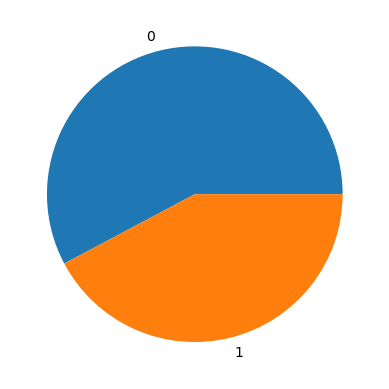

In [68]:
plt.pie(df['HS'].value_counts(),labels=df['HS'].value_counts().keys())
plt.show()

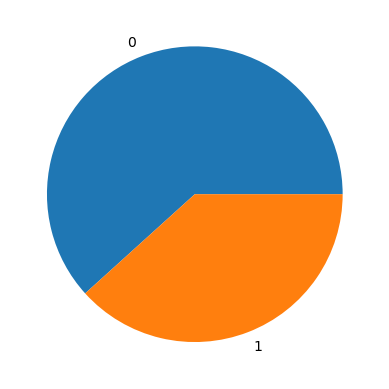

In [69]:
plt.pie(df['Abusive'].value_counts(),labels=df['Abusive'].value_counts().keys())
plt.show()

<Axes: >

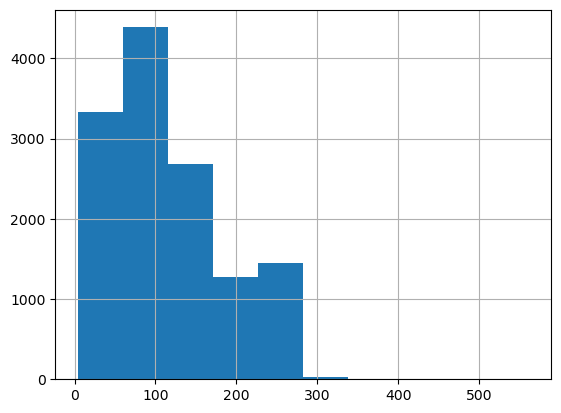

In [70]:
df.lenght_of_Characters_with_spaces.hist()

<Axes: >

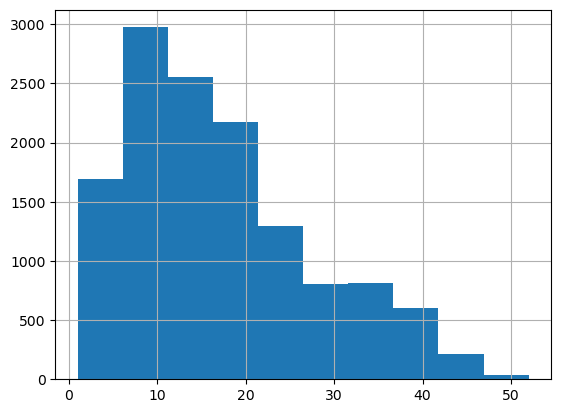

In [71]:
df.lenght_of_Words.hist()

In [72]:
df_hate_speech = df.loc[df['HS'] == 1]
df_not_hate_speech = df.loc[df['HS'] == 0]

<Axes: >

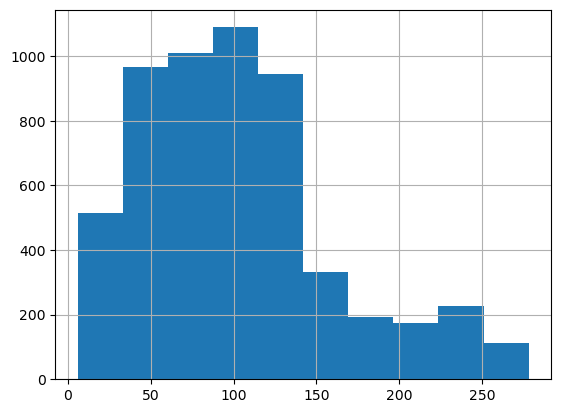

In [73]:
df_hate_speech.lenght_of_Characters_with_spaces.hist()

<Axes: >

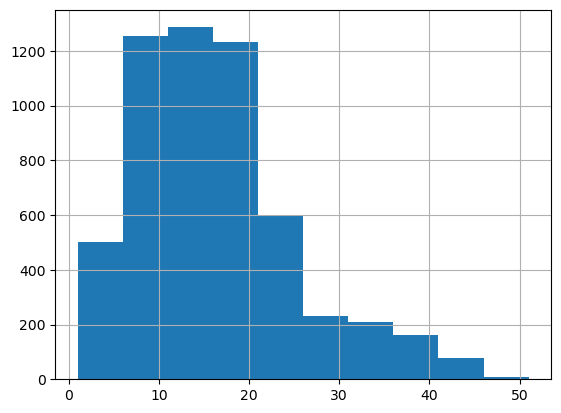

In [74]:
df_hate_speech.lenght_of_Words.hist()

<Axes: >

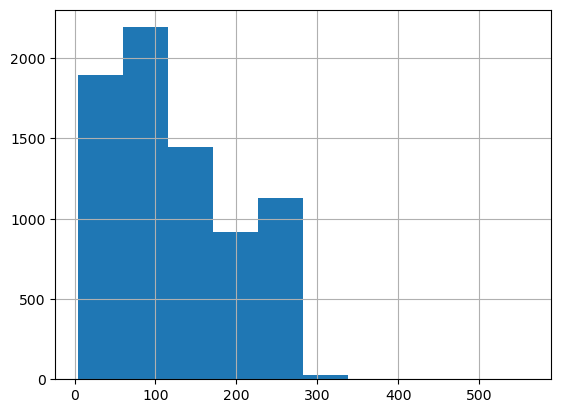

In [75]:
df_not_hate_speech.lenght_of_Characters_with_spaces.hist()

<Axes: >

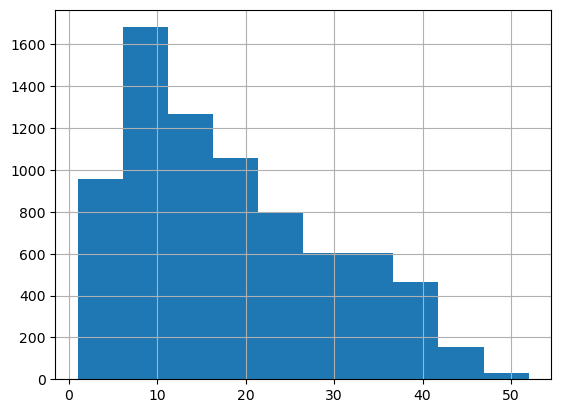

In [76]:
df_not_hate_speech.lenght_of_Words.hist()

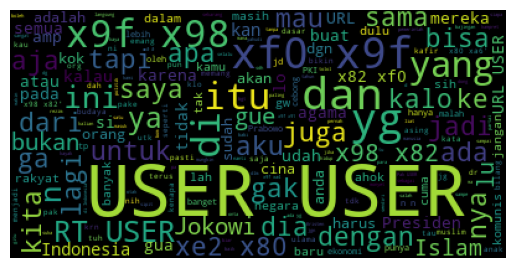

In [77]:
text = ' '.join(df['Tweet'])
wordcloud = WordCloud().generate(text)

# Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

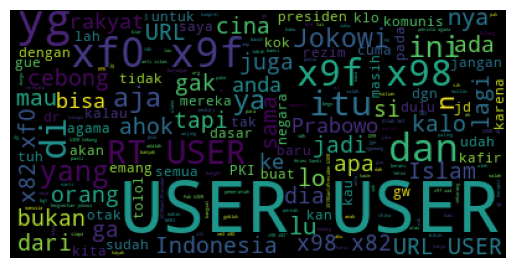

In [78]:
text = ' '.join(df_hate_speech['Tweet'])
wordcloud = WordCloud().generate(text)

# Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

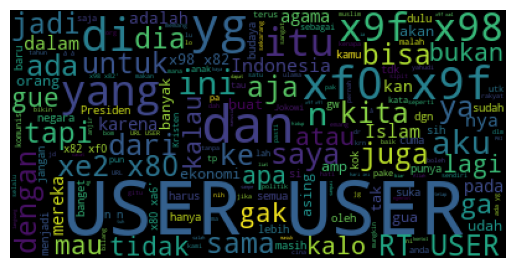

In [79]:
text = ' '.join(df_not_hate_speech['Tweet'])
wordcloud = WordCloud().generate(text)

# Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<Axes: >

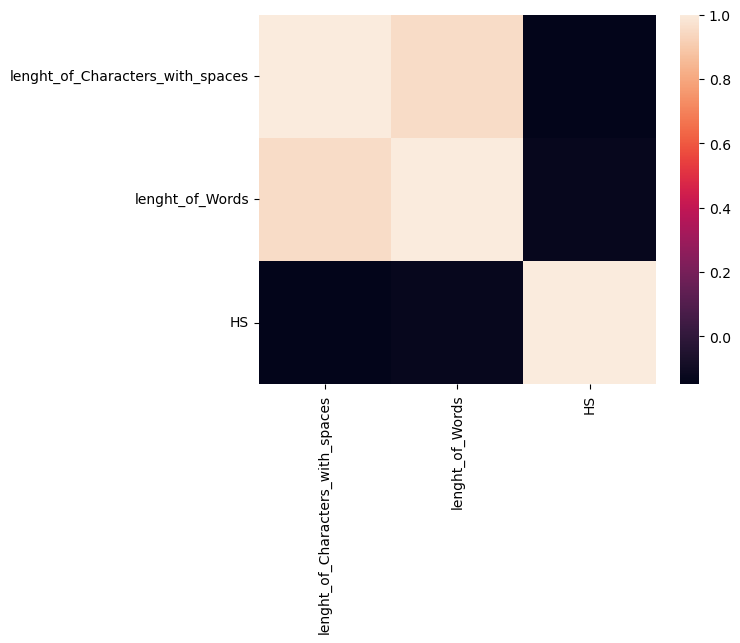

In [88]:
sns.heatmap(df[['lenght_of_Characters_with_spaces','lenght_of_Words','HS']].corr())

In [89]:
df[['lenght_of_Characters_with_spaces','lenght_of_Words','HS']].corr()

,lenght_of_Characters_with_spaces,lenght_of_Words,HS
lenght_of_Characters_with_spaces,1.000000,0.954934,-0.148950
lenght_of_Words,0.954934,1.000000,-0.129296
HS,-0.148950,-0.129296,1.000000


In [82]:
df.columns

Index(['Tweet', 'HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion',
       'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak',
       'HS_Moderate', 'HS_Strong', 'lenght_of_Characters_with_spaces',
       'lenght_of_Words', 'user_mentioned', 'abusive_words_mentioned',
       'alay_words_mentioned', 'alay_words_mentioned_grouped'],
      dtype='object')

<Axes: >

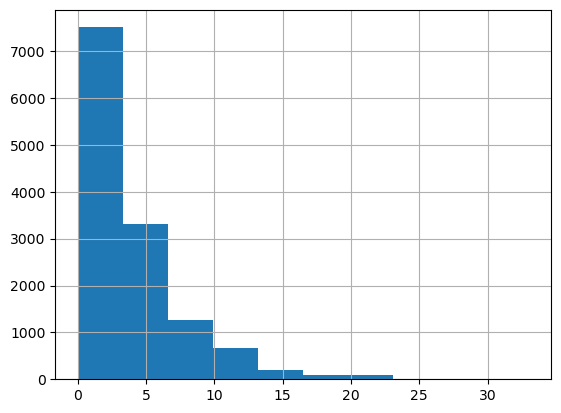

In [85]:
df.alay_words_mentioned.hist()

<Axes: >

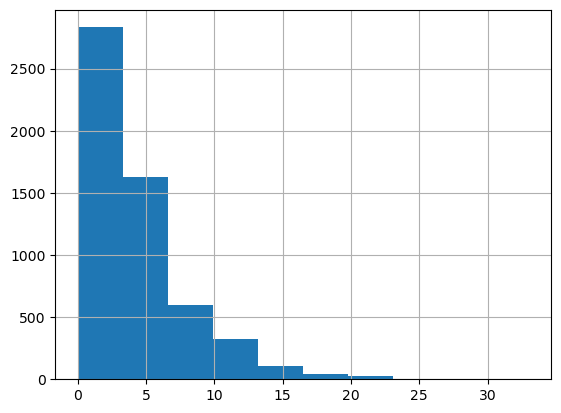

In [95]:
df_hate_speech.alay_words_mentioned.hist()

<Axes: >

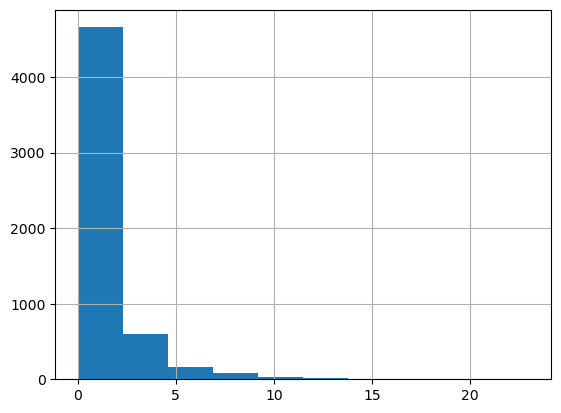

In [96]:
df_hate_speech.user_mentioned.hist()

<Axes: >

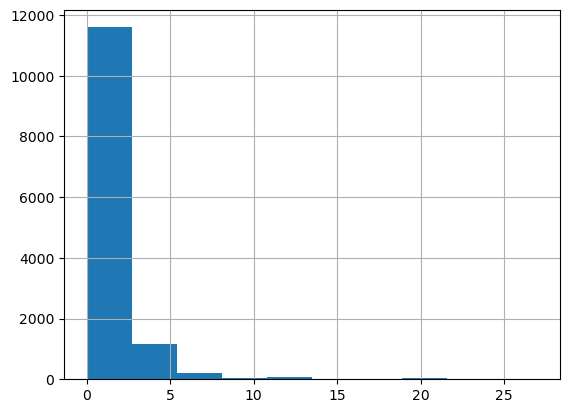

In [87]:
df.user_mentioned.hist()

<Axes: xlabel='lenght_of_Words', ylabel='HS'>

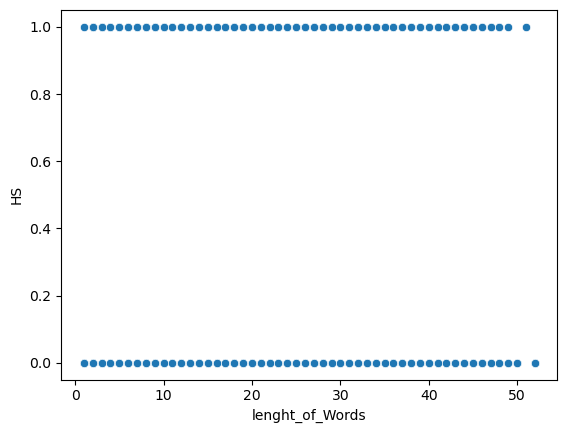

In [90]:
sns.scatterplot(x=df['lenght_of_Words'], y=df['HS'])

In [97]:
df_user_mentioned = df.loc[df['user_mentioned'] > 5]
df_alay_mentioned = df.loc[df['alay_words_mentioned'] > 5]

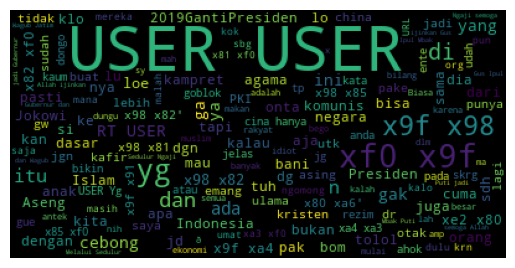

In [98]:
text = ' '.join(df_user_mentioned['Tweet'])
wordcloud = WordCloud().generate(text)

# Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

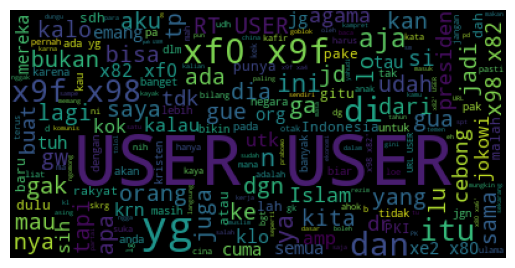

In [99]:
text = ' '.join(df_alay_mentioned['Tweet'])
wordcloud = WordCloud().generate(text)

# Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()